# Business Statement

**The following dataset is from DataCamp to perform AB Testing on fictional data where photo of a cat wearing a hat will result in more clicks**

**We will test the statistical signficance of the differences in test and control groups and conclude our analysis based on the above Hypothesis test**

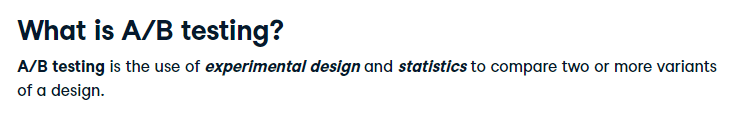

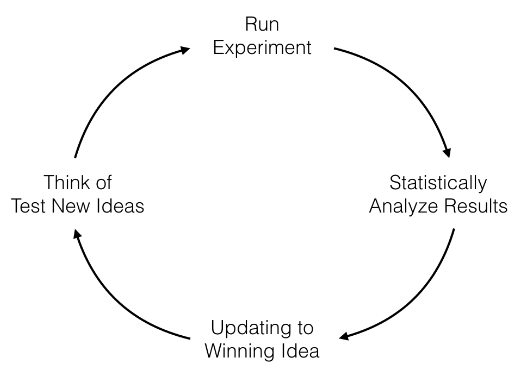

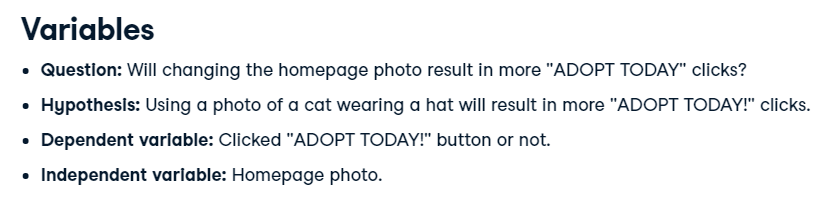

In [6]:
library(tidyverse)
library(lubridate)
#library(powerMediation)
library(broom)

In [1]:
df <- read.csv('../input/data-campexperiment-dataset/experiment_data.csv')

head(df)

,visit_date,condition,clicked_adopt_today
,<chr>,<chr>,<int>
1,2018-01-01,control,0
2,2018-01-01,control,1
3,2018-01-01,control,0
4,2018-01-01,control,0
5,2018-01-01,test,0
6,2018-01-01,test,0


**Based on the data below we see that all the dates are for the month of January 2018 i.e. 1st January - 31st Janaury

**We will test the hypothesis on the sample from the month of Jan and conclude our results**

In [3]:
min(df$visit_date)
max(df$visit_date)

[1] "2018-01-01"

[1] "2018-01-31"

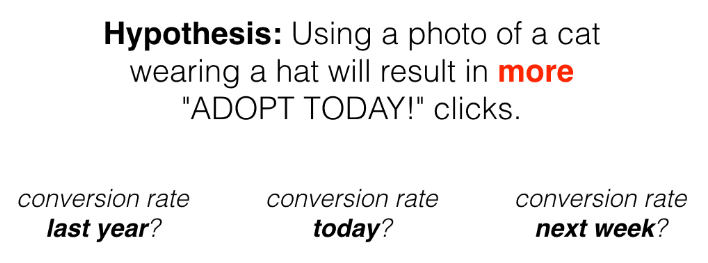

# Hypothesis Testing 

**H0 - Conversion rates of website with Photo of cat wearing no hat and with hat is the  same**

**H1 - Conversion rates of website of Photo of cat wearing hat and no hat is different**

In [7]:
df_1 <- df %>% group_by(visit_date,condition)%>%
               summarize(conversion_rate = mean(clicked_adopt_today))

head(df_1)

`summarise()` has grouped output by 'visit_date'. You can override using the
`.groups` argument.


visit_date,condition,conversion_rate
<chr>,<chr>,<dbl>
2018-01-01,control,0.2500000
2018-01-01,test,0.4285714
2018-01-02,control,0.2500000
2018-01-02,test,0.3333333
2018-01-03,control,0.0000000
2018-01-03,test,0.5000000


In [ ]:
ggplot(df_1,
       aes(x = visit_date,
           y = conversion_rate,
           color = condition,
           group = condition)) +
  geom_point() +
  geom_line()

**Since the dates are not clearly visible in the following plot, we will isolate the day of the time stamp and visualize the results. Since the data is only for the month of Jan this is feasible**

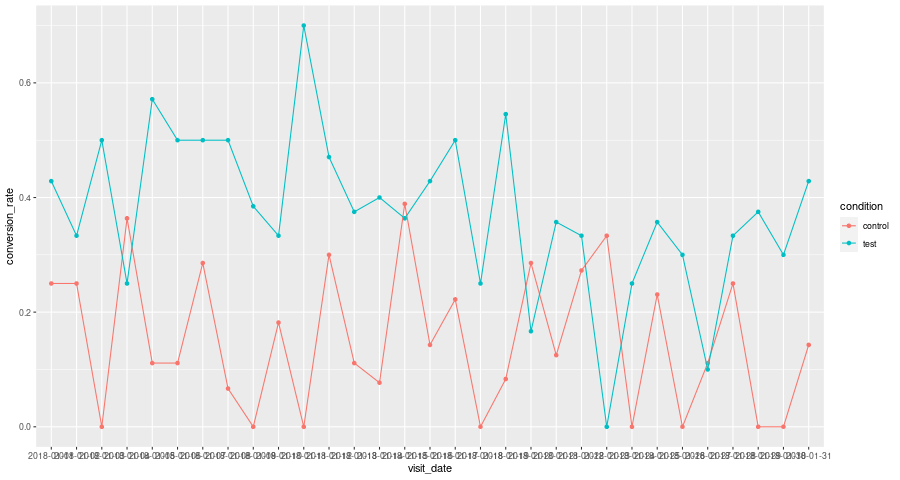

In [ ]:
df_2 <- df_1 %>% mutate(day= day(visit_date))

head(df_2)

In [ ]:
ggplot(df_2,
       aes(x = day,
           y = conversion_rate,
           color = condition,
           group = condition)) +
  geom_point() +
  geom_line()

Test group consistently performs better than control group for the whole month based on the plot below.

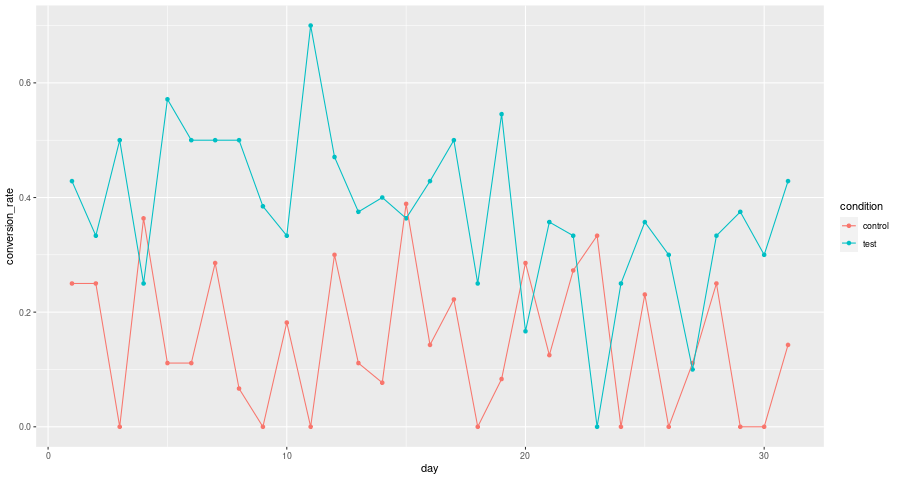

**Summarizing the mean conversion rate for the dataset , we see that Test group performed almost 22 percentage points better than control group.**

**The results show that cat with hat has performed exceptionally better than cat without the hat.However are these results statistically significant? Are the differences due to chance or they would be consistent if repeated times?**

**To conclude the above we need incorportate statistical model to see if it is statistically significant**

In [8]:
 df%>%
  group_by(condition) %>%
  summarize(conversion_rate = mean(clicked_adopt_today))

condition,conversion_rate
<chr>,<dbl>
control,0.1666667
test,0.3843537


# Power Analysis - Sample Size Calculation

In [ ]:
# Compute and look at sample size for experiment  with a 22 percentage point increase
total_sample_size <- SSizeLogisticBin(p1 = 0.16,
                                      p2 = 0.38,
                                      B = 0.5,
                                      alpha = 0.05,
                                      power = 0.8)
total_sample_size

**Since Kaggle does not have powerMediation package , I used R studio to calculate sample size need. It gave -126. Hence we would need 63 per group as samples to see significant effect in conversion rate**

# Logistic Regression

**Binomial distribution model is ideal for this since it is designed for experiments with probablility of SUCCESS and FAILURE. In this context, have the conversion rates results in success or failure.**

**By using this, we can provide a statistically significant results if there are any differences of the outcome.**

In [9]:
experiment_results <- glm(clicked_adopt_today ~ condition,
                          family = "binomial",
                          data = df) %>%tidy()

experiment_results

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.609438,0.1564922,-10.284464,8.280185e-25
conditiontest,1.138329,0.1971401,5.774212,7.731397e-09


**Results show that p value of the condition is 0.000000007. Since the value is below 0.05, we can safely reject the NULL HYPOTHESIS which says that there is no difference in conversion bettwen photo of cat without hat and with hat.**

**We can go ahead and say incorporate changes saying that photo of Cat with hat leads to more conversion**